> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> 
This dataset contains information about more than 10,000 movies from The Movie Database, including budget, revenue, cast, genre, release date and user ratings.

There are two main questions that I plan to explore over the course of the report:

1) Which genres are most popular from year to year?

2) What kinds of properties (budget, runtime, genre) are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01   32% |██████████▍                     | 3.4MB 24.9MB/s eta 0:00:01    43% |██████████████                  | 4.6MB 23.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01  8% |██▋                             | 1.1MB 23.1MB/s eta 0:00:01    25% |████████▏                       | 3.4MB 23.5MB/s eta 0:00:01    34% |███████████                     | 4.6MB 23.6MB/s eta 0:00:01    50% |████████████████▏               | 6.8MB 24.0MB/s eta 0:00:01    58% |██████████████████▉             | 7.9MB 22.7MB/s eta 0:00:01    66% |█████████████████████▏          | 8.9MB 22.9MB/s eta 0:00:01    99% |████████████████████████████████| 13.4MB 23.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pa

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Perform operations to inspect data types.
# look for instances of missing or possibly errant data.
# Look for the datatype for genres, budget_adj, revenue_adj and release_year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# Look for duplicated data
sum(df.duplicated())

1

In [9]:
# Look for unique values of genre in the dataset.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# Look for the mean popularity, budget_adj, runtime and revenue_adj in the dataset.
# The budget_adj and revenue_adj show the budget and revenue of the associated
# movie in terms of 2010 dollars, accounting for inflation over time.
df.mean()

id              6.606418e+04
popularity      6.464410e-01
budget          1.462570e+07
revenue         3.982332e+07
runtime         1.020709e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      1.755104e+07
revenue_adj     5.136436e+07
dtype: float64


### Data Cleaning

In [11]:
# Drop extraneous columns.
df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

# Confirm changes
df.head(1)

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


In [12]:
# View missing value count for each feature.
df.isnull().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [13]:
# Drop rows with any null values.
df.dropna(inplace=True)

# Check if any of columns have null values - should print False.
df.isnull().sum().any()

False

In [14]:
# Drop duplicates in dataset.
df.drop_duplicates(inplace=True)

# Print number of duplicates to confirm dedupe - should be 0.
sum(df.duplicated())

0

In [17]:
#Several values for budget_adj, revenue_adj and runtime are 0, which is an outlier. I'm going to replace the 0's with the mean of each column.

In [18]:
budget_adj_mean = df['budget_adj'].mean()
revenue_adj_mean = df['revenue_adj'].mean()
runtime_mean = df['runtime'].mean()

df['budget_adj'] = df['budget_adj'].replace(to_replace=0, value=budget_adj_mean)
df['revenue_adj'] = df['revenue_adj'].replace(to_replace=0, value=revenue_adj_mean)
df['runtime'] = df['runtime'].replace(to_replace=0, value=runtime_mean)

In [19]:

# Convert budget_adj and revenue_adj columns to int.
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

# Confirm change of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
id                10842 non-null int64
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null float64
genres            10842 non-null object
release_year      10842 non-null int64
budget_adj        10842 non-null int64
revenue_adj       10842 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 762.3+ KB


In [20]:
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [21]:
# Cheack that all the original genres rows with "|" are gone
df['genres'].nunique()

20

In [22]:
df.head()

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124.0,Action,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,120.0,Action,2015,137999939,348161292
2,262500,13.112507,Insurgent,119.0,Adventure,2015,101199955,271619025
3,140607,11.173104,Star Wars: The Force Awakens,136.0,Action,2015,183999919,1902723129
4,168259,9.335014,Furious 7,137.0,Action,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis

### 1) Which genres are most popular from year to year?

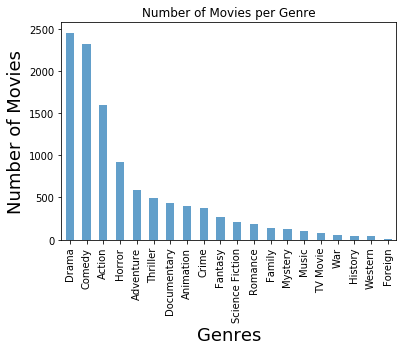

In [27]:
df['genres'].value_counts().plot(kind='bar', title='Number of Movies per Genre', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18);
#This plot shows the counts for all the values in the genres column.

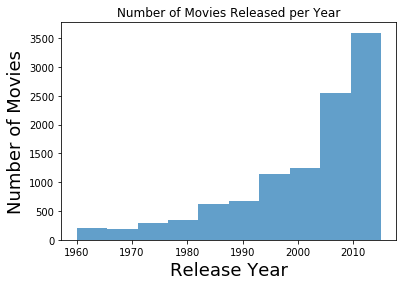

In [28]:
df['release_year'].plot(kind='hist', title='Number of Movies Released per Year', alpha=.7)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18);
#This histogram shows the distribution of the release year of all the movies in the dataset.

In [29]:
df_mean_pop = df.groupby( [ 'release_year', 'genres' ])['popularity'].mean().to_frame(name = 'popularity').reset_index()
df_mean_pop.head(n=17)

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.304992
2,1960,Comedy,0.392067
3,1960,Crime,0.269428
4,1960,Drama,0.687575
5,1960,Horror,0.254964
6,1960,Thriller,0.456165
7,1961,Action,0.540904
8,1961,Adventure,1.394596
9,1961,Comedy,0.431700


In [30]:
## Creates a dataframe with the most popular genre by year from 1960 to 2015
idx = df_mean_pop.groupby(['release_year'])['popularity'].transform(max) == df_mean_pop['popularity']
df_year_genre = df_mean_pop[idx]
df_year_genre.head(n=20)

,release_year,genres,popularity
4,1960,Drama,0.687575
8,1961,Adventure,1.394596
18,1962,Adventure,1.283631
29,1963,Animation,2.180410
36,1964,Adventure,0.736431
47,1965,Adventure,1.121328
57,1966,Animation,0.740509
76,1967,Family,2.550704
92,1968,Science Fiction,2.088194
101,1969,History,1.357317


genres
Action       0.590724
Adventure    0.304992
Comedy       0.392067
Crime        0.269428
Drama        0.687575
Horror       0.254964
Thriller     0.456165
Name: popularity, dtype: float64


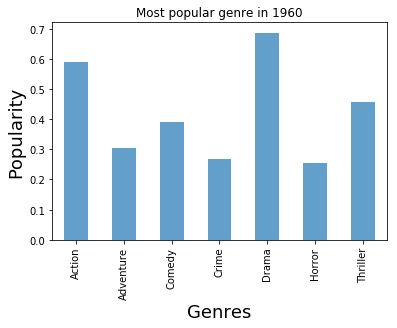

In [31]:
# Selecting all the movies released in 1960
df_1960 = df[df['release_year'] == 1960]

# Find the mean popularity of each genre.
print(df_1960.groupby('genres')['popularity'].mean())

# Plot a bargraph to show the most popular genre in that year.
df_1960.groupby('genres')['popularity'].mean().plot(kind='bar', title='Most popular genre in 1960', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

14
Adventure          18
Science Fiction     8
Animation           6
Romance             4
Fantasy             3
Family              3
Music               3
Drama               3
Western             2
Mystery             2
Crime               1
Horror              1
History             1
Thriller            1
Name: genres, dtype: int64


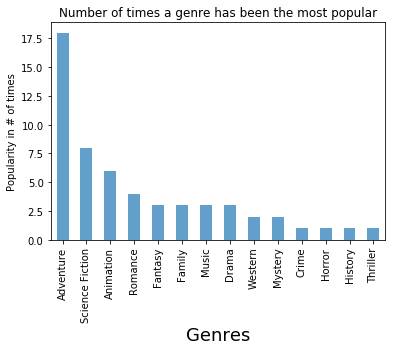

In [32]:
print(df_year_genre['genres'].nunique())
print(df_year_genre['genres'].value_counts())
df_year_genre['genres'].value_counts().plot(kind='bar', title='Number of times a genre has been the most popular', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Popularity in # of times');

### 2) What kinds of properties (budget, runtime, genre) are associated with movies that have high revenues?

In [34]:
# Compute statistics for all parameters
print(df['genres'].nunique())
df.describe()
# This code is so we can find some limits to the parameters:
#the mean runtime is 102, the max is 900, and the min is 2. The mean budget_adj is 26796020, the max is 425000000, and the min is 1000000. The mean revenue_adj is 79932830, the max is 2827124000, and the min is 2000000. The database contains twenty unique values for genres.

20


,id,popularity,runtime,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,102.421062,2001.314794,2.679108e+07,7.993283e+07
std,91981.355752,1.001032,30.828622,12.813617,3.053264e+07,1.366907e+08
min,5.000000,0.000065,2.000000,1960.000000,0.000000e+00,2.000000e+00
25%,10589.250000,0.208210,90.000000,1995.000000,1.758712e+07,5.147797e+07
50%,20557.000000,0.384532,99.000000,2006.000000,1.758712e+07,5.147797e+07
75%,75186.000000,0.715393,111.000000,2011.000000,2.092507e+07,5.147797e+07
max,417859.000000,32.985763,900.000000,2015.000000,4.250000e+08,2.827124e+09


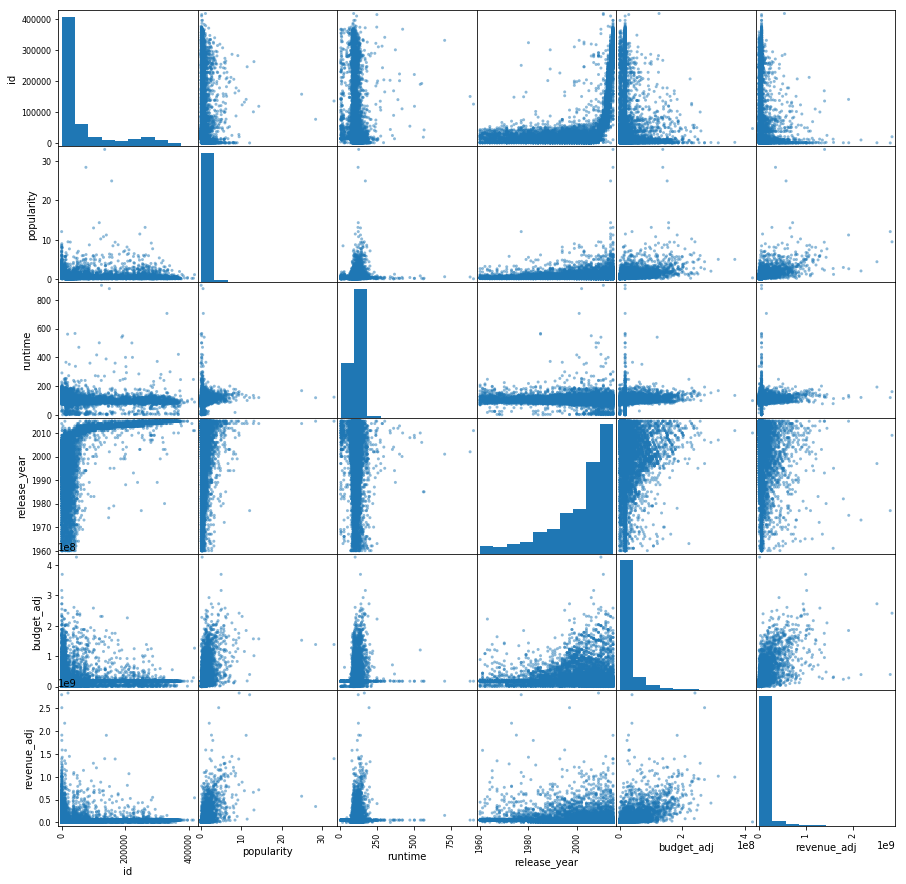

In [35]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

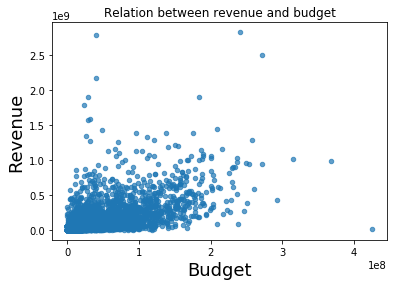

In [36]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', title='Relation between revenue and budget', alpha=.7)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

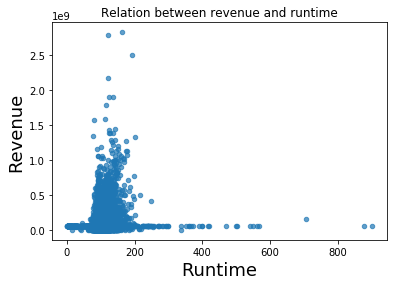

In [37]:
df.plot(x='runtime', y='revenue_adj', kind='scatter', title='Relation between revenue and runtime', alpha=.7);
plt.xlabel('Runtime', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

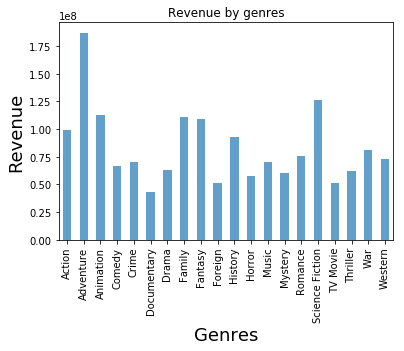

In [40]:
df.groupby('genres')['revenue_adj'].mean().plot(kind='bar', title='Revenue by genres', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Revenue', fontsize=18);
#In average, Adventure movies generate the most revenue with Sci-Fi as a distant second.

<a id='conclusions'></a>
## Conclusions
Which genres are most popular from year to year?
The answer to this question obviously varies from year to year.

The following dataframe clearly shows the most popular genre of each year in the dataset.

In [41]:
df_year_genre

,release_year,genres,popularity
4,1960,Drama,0.687575
8,1961,Adventure,1.394596
18,1962,Adventure,1.283631
29,1963,Animation,2.180410
36,1964,Adventure,0.736431
47,1965,Adventure,1.121328
57,1966,Animation,0.740509
76,1967,Family,2.550704
92,1968,Science Fiction,2.088194
101,1969,History,1.357317


In [43]:
#From this experiment we can learn that the most popular of the year varies a lot and that there is not really a trend, any genre could possibly become the most popular genre of a year.

#There are some weaknesses in the data that may have influenced the results:

#The popularity scores are calculated using votes and views of the site. This greatly limits the findings since it only represents the preferences of a small group of people (the site users).
#In many cases (specially with old movies), the popularity scores don't reflect the taste of the people that experienced the movie release date.
#Many genres were listed for one movie. By sticking to just the first genre listed, the findings don't show the diverse nature of movies that usually incorporate many genres.
#Causation or association cannot be proven regarding to if any genre is the most popular because of the year. Specially, since all the ratings have been calculated recently.

#The results don't really prove which is the most popular genre of each year, but might give a hint of what are the genres from the favorite movies of the users of the site.

#These findings pertain to the field of entertainment. The users of the site might be interested in the findings.

#My research uncovers the following questions:

#How could we properly take into consideration the multiple genres that each movie has?
#Does the popularity of a genre really represents the popularity of the given genre or the genre of the most popular movies of that year?
#What visualizations can be used to show the most popular genre of each year in a way that would allow us to catch trends in popularity?


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])